### Marissa McKee
#### Introduction to Neural Networks using Keras
UNT ADTA 5550 Summer 2020

### Iris Dataset 
Relevant Information: 
- the dataset contains 3 classes of 50 instances each; each class refers to a type of iris plant
- predicted attribute: clas of iris plant
- Number of instances: 150 (50 in each class)
- Number of predictors: 4 numeric, predictive attributes and the class

Attribute Information:
- sepal length in cm
- sepal width in cm
- petal length in cm
- petal width in cm
- class: iris setosa, iris veriscolour, iris virginica 

In [1]:
# Import libraries 
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

Using TensorFlow backend.


## 1. Import Data

In [2]:
# Import Iris.csv into dataframe 
df = pd.read_csv (r'Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## 2. Data Preprocessing

### Null handling

In [3]:
print('Null Count:\n\n',df.isnull().sum())

Null Count:

 Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


### Data shape

In [4]:
# Row count, column count
df.shape

(150, 6)

### Columns

In [5]:
# Columns in dataframe 
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

### Categorical Count

In [6]:
# Species count
df.groupby('Species').size()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

### Descriptive Statistics

In [7]:
# Descriptive statistics
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


## 3. Exploratory Data Analysis

### Histograms

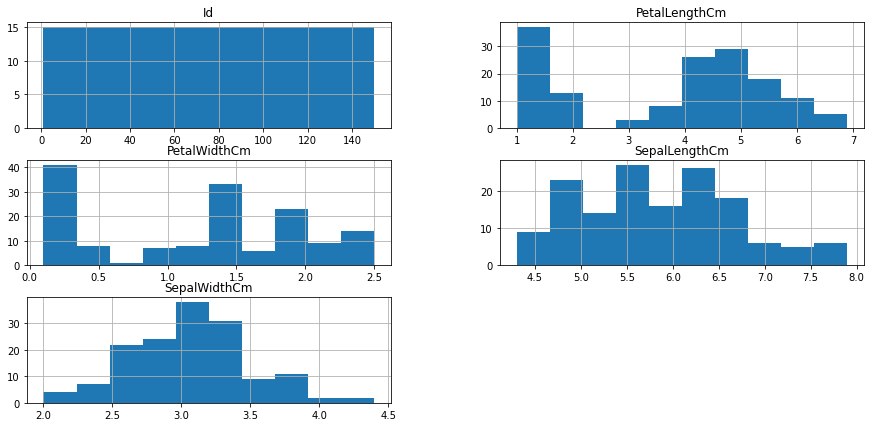

In [8]:
# Display histograms for each column 
df.hist(figsize=(15,7))
plt.show()

### Density Plots

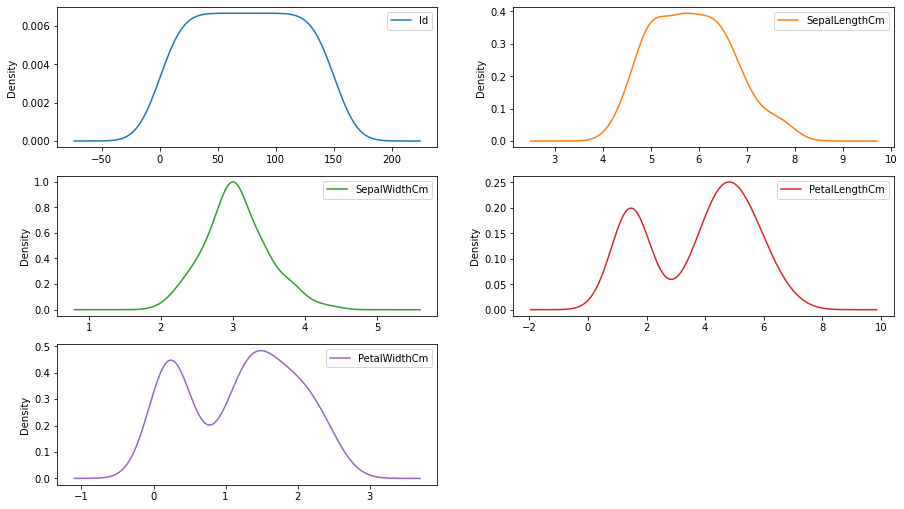

In [9]:
# Display density plots for each column 
df.plot(kind='density',subplots=True, layout=(5,2),sharex=False,figsize=(15,15))
plt.show()

### Scatter Matrix

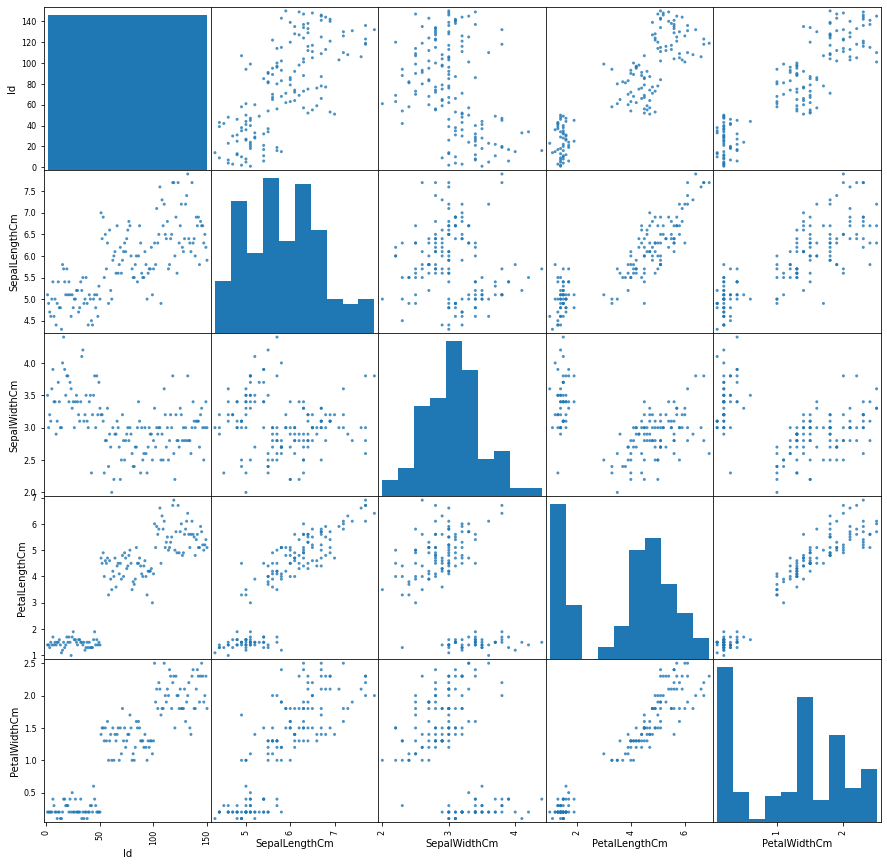

In [10]:
# Display scatter plot matrix
scatter_matrix(df, alpha=.8, figsize=(15,15))
plt.show()

### Swarm Plots

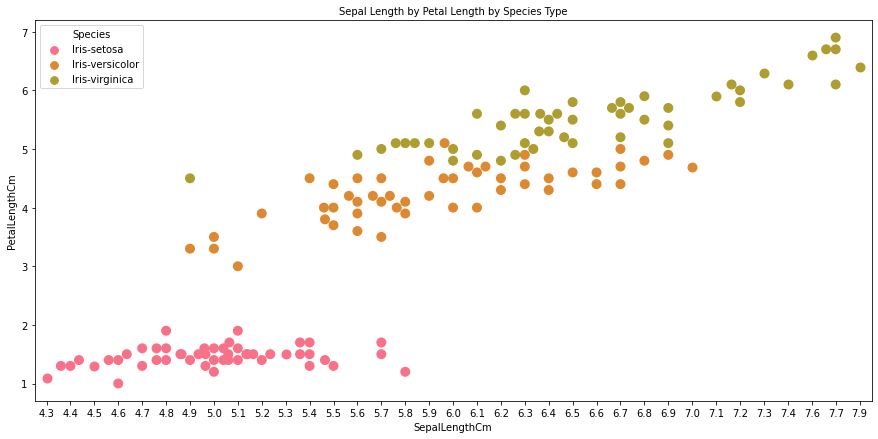

In [11]:
# Display swarm plot of sepal length, petal length, and species type
results = df.groupby(['Species']).head(150)
plt.figure(figsize=(15,7))
g = sns.swarmplot(x='SepalLengthCm', y='PetalLengthCm', hue='Species', 
                  data=results, size=10, palette=sns.color_palette('husl',10))
g.tick_params(labelsize=10)
plt.title('Sepal Length by Petal Length by Species Type',fontsize=10)
plt.show()

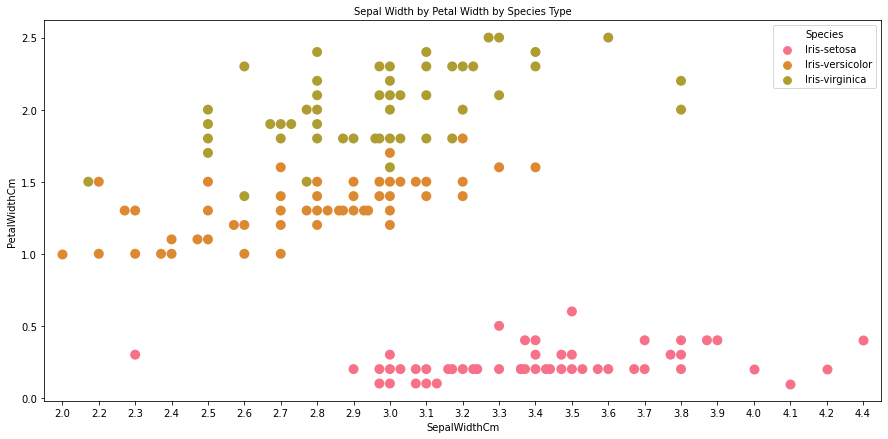

In [12]:
# Display swarm plot of sepal width, petal width, and species type
results = df.groupby(['Species']).head(150)
plt.figure(figsize=(15,7))
g = sns.swarmplot(x='SepalWidthCm', y='PetalWidthCm', hue='Species', 
                  data=results, size=10, palette=sns.color_palette('husl',10))
g.tick_params(labelsize=10)
plt.title('Sepal Width by Petal Width by Species Type',fontsize=10)
plt.show()

## 4. Split Data into Training and Testing

### Convert DataFrame to Array

In [13]:
# Convert dataframe into an array
array = df.values

# Dependent variables
X = array[:,1:5]

# Target variable
y = array[:,5]

print(y)

['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor

### One Hot Encoding 
One hot encoding allows the representation of categorical data to be more expressive. Categories are converted into numbers. One hot encoding can be done manually or automatically with pandas, scikit-learn, or keras. 

In [14]:
# Encode the target variable into categorical binary numeric values
le = LabelEncoder()
le.fit(y)
le_encoded = le.transform(y)
y = np_utils.to_categorical(le_encoded)
print(y)

[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0.

### Split 67% Train 33% Test

In [15]:
# Split the dataset 67% train 33% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

## 5. MLP Fully Connected Neural Network Model
Network: 2 layered MLP:
- Input neurons
- 1 hidden layer
- output layer

Optimizer: Adam - stochastic gradient descent method that is based on adaptive estimation of first order and second order moments. 

Loss: categorical_crossentropy - computes the cross entropy loss between labels and predicted values. Use crossentropy when there are two or more label classes. Labels need to be provided in a one_hot representation. 

Metrics: accuracy - calculates how often predictions equals labels. The metric creates two local variables, total and count that are used to compute the frequency which y_pred matches y_true. 

Layer activation functions:
- relu: applies the rectified linear unit activation function. With default vallues, this returns the standard ReLU activation: max(x,0), the element wise maximum of 0 and the input tensor. 
- softmax: converts a real vector to a vector of categorical probabilities. The elements of the output vector are in range (0,1) and sum to 1. Each vector is handled independently. The axis argument sets which axis of the input the function is applied along. Softmax is often used as the activation for the last layer of a classification network because the result could be interpreted as a probability distribution. 

Sequential class: groups a linear stack of layers into a tf.keras.Model. It provides training and inference features on a model. 

Dense class: is a core layer. It's a densely connected NN layer. It implements the operation output = activation(dot(input, kernel) + bias) where activation is the element-wise activation function passed as the activation argument, kernel is a weights matrix created by the layer, and bias is a bias vector created by the layer (only applicable if use_bias is True).

### Baseline Model

In [16]:
# Define a baseline model
def baseline_model():
    model = Sequential()
    # Add hidden layer with 8 neurons
    model.add(Dense(8, input_dim = 4, activation = 'relu'))
    # Add hidden layer with 2 neurons
    model.add(Dense(5, activation = 'relu'))
    # Add output layer with 3 neurons
    model.add(Dense(3, activation = 'softmax'))
    
    model.compile(loss = 'categorical_crossentropy',
                 optimizer = 'adam',
                 metrics = ['accuracy'])
    return model

In [17]:
model = baseline_model()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


### Train Model
- epoch: an arbitrary cutoff, generally defined as one pass over the entire dataset used to separate training into distinct phases, which is useful for logging and periodic evaluation. 
- batch size: number of samples processed before the model is updated. The number of epochs is the number of complete passes through the training set. The size of a batch must be more than or equal to one and less than or equal to the number of samples in the training set. 

In [18]:
# Train model
model.fit(X_train, y_train, epochs = 150, batch_size = 10)


Epoch 1/150
100/100 [==============================] - 0s 5ms/step - loss: 2.5181 - accuracy: 0.3400
Epoch 2/150
100/100 [==============================] - 0s 159us/step - loss: 2.1212 - accuracy: 0.3400
Epoch 3/150
100/100 [==============================] - 0s 141us/step - loss: 1.7785 - accuracy: 0.3400
Epoch 4/150
100/100 [==============================] - 0s 142us/step - loss: 1.5008 - accuracy: 0.3400
Epoch 5/150
100/100 [==============================] - 0s 143us/step - loss: 1.3024 - accuracy: 0.3400
Epoch 6/150
100/100 [==============================] - 0s 147us/step - loss: 1.1759 - accuracy: 0.3400
Epoch 7/150
100/100 [==============================] - 0s 141us/step - loss: 1.1093 - accuracy: 0.3400
Epoch 8/150
100/100 [==============================] - 0s 139us/step - loss: 1.0615 - accuracy: 0.3400
Epoch 9/150
100/100 [==============================] - 0s 140us/step - loss: 1.0334 - accuracy: 0.3400
Epoch 10/150
100/100 [==============================] - 0s 138us/step - lo

### Run Model

In [19]:
evaluator = KerasClassifier(build_fn = baseline_model, epochs = 200,
                           batch_size = 5)

## 6. Model Validation with K Fold
K-fold: KFold divides all the samples in  groups of samples, called folds (if , this is equivalent to the Leave One Out strategy), of equal sizes (if possible). The prediction function is learned using  folds, and the fold left out is used for test.
- k = 10

In [20]:
# Kfold cross validation 
kfold = KFold(n_splits = 10, shuffle = True, random_state = 42)

In [21]:
results = cross_val_score(evaluator, X_test, y_test, cv = kfold)

print('Baseline: %.2f%% (%.2f%%)' % (results.mean()*100, results.std()*100))

Epoch 1/200
45/45 [==============================] - 0s 10ms/step - loss: 3.0340 - accuracy: 0.4444
Epoch 2/200
45/45 [==============================] - 0s 290us/step - loss: 2.6885 - accuracy: 0.6444
Epoch 3/200
45/45 [==============================] - 0s 287us/step - loss: 2.3824 - accuracy: 0.6444
Epoch 4/200
45/45 [==============================] - 0s 288us/step - loss: 2.0665 - accuracy: 0.6444
Epoch 5/200
45/45 [==============================] - 0s 282us/step - loss: 1.8483 - accuracy: 0.6444
Epoch 6/200
45/45 [==============================] - 0s 283us/step - loss: 1.7022 - accuracy: 0.6222
Epoch 7/200
45/45 [==============================] - 0s 279us/step - loss: 1.5715 - accuracy: 0.6222
Epoch 8/200
45/45 [==============================] - 0s 280us/step - loss: 1.4919 - accuracy: 0.5778
Epoch 9/200
45/45 [==============================] - 0s 290us/step - loss: 1.4192 - accuracy: 0.5778
Epoch 10/200
45/45 [==============================] - 0s 287us/step - loss: 1.3735 - accurac

## 7. Model Evaluation

In [22]:
# Evaluate the model
scores = model.evaluate(X_test, y_test)
print('\n%s: %.2f%%' % (model.metrics_names[1],scores[1]*100))

50/50 [==============================] - 0s 3ms/step

accuracy: 100.00%
